# NY Motor Vehicle Collisions – Exploratory Data Analysis  
In this notebook, we analyze New York’s Vehicular crash data available at https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95


The data contains information from all police reported motor vehicle collisions in NYC. The information for this dataset is collated from the police report, called MV104-AN, which is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

Data is available from 2012-07-01 onwards, however for this analysis, we will limit ourselves to the period up to 2023-08-15, which is when the data was downloaded.

We find that this data contains over 2 million observations, which allows us to explore several aspects of vehicle crashes in NY's boroughs.

The data dictionary for the data is also available at the URL above.

First, we perform unstructured exploration of the data, and then try to answer the following questions:

- We look for which borough has had the maximum number of crashes reported since 2012.

- We relate the number of crashes to to the borough's population to find out which borough has the maximum number of crashes for every 100,000 people. Even though the data does not have this information, we can combine the crash data with the population estimates for the boroughs also available from the City of New York's website (https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9)

| Borough | Population |
| --- | --- |
| Bronx | 1446788 |
| Brooklyn | 2648452 |
| Manhattan | 1638281 |
| Queens | 2330295 |
| Staten Island | 487155 |  

  
- We look for the leading cause of crashes

- We also look for the top-3 causes of crashes, and try to calculate what proportion of all crashes are caused by these top-3 causes.

- We then look to some of the more serious implications of crashes by examining how many accidents involved at least one fatality.

- We then compute, on average, out of every 1000 accidents, how many have resulted in at least one person dead.

- We also look for missing data and try to compute the proportion of accidents in the data that do not have a Borough code.

- The fields 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' represent the first two vehicles involved in the accident.  We look for which combinations of vehicles have the most number of accidents.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import phik
from IPython.display import Markdown as md

In [3]:
df = pd.read_pickle("shared/Motor_Vehicle_Collisions_-_Crashes.pkl")
df


,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


***
### Show some exploratory data analysis here
***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018245 entries, 0 to 2018244
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE_CRASH TIME          datetime64[ns]
 1   BOROUGH                        object        
 2   ZIP CODE                       object        
 3   LATITUDE                       float64       
 4   LONGITUDE                      float64       
 5   LOCATION                       object        
 6   ON STREET NAME                 object        
 7   CROSS STREET NAME              object        
 8   OFF STREET NAME                object        
 9   NUMBER OF PERSONS INJURED      float64       
 10  NUMBER OF PERSONS KILLED       float64       
 11  NUMBER OF PEDESTRIANS INJURED  int64         
 12  NUMBER OF PEDESTRIANS KILLED   int64         
 13  NUMBER OF CYCLIST INJURED      int64         
 14  NUMBER OF CYCLIST KILLED       int64         
 15  NUMBER OF MOTOR

In [26]:
# Display summary statistics for numerical columns
df.describe()

,CRASH DATE_CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,Year
count,2018245,1.788560e+06,1.788560e+06,2.018227e+06,2.018214e+06,2.018245e+06,2.018245e+06,2.018245e+06,2.018245e+06,2.018245e+06,2.018245e+06,2.018245e+06,2.018245e+06
mean,2017-05-14 17:39:03.899198976,4.062776e+01,-7.375228e+01,3.024249e-01,1.446328e-03,5.518507e-02,7.253827e-04,2.612468e-02,1.119785e-04,2.179889e-01,5.896212e-04,3.116455e+06,2.016855e+03
min,2012-07-01 00:05:00,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,2.012000e+03
25%,2014-12-19 18:00:00,4.066792e+01,-7.397493e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.140681e+06,2.014000e+03
50%,2017-03-29 21:15:00,4.072102e+01,-7.392732e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.645346e+06,2.017000e+03
75%,2019-06-10 18:30:00,4.076956e+01,-7.386665e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.150156e+06,2.019000e+03
max,2023-08-15 23:59:00,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.655026e+06,2.023000e+03
std,NaN,1.980901e+00,3.727568e+00,6.937633e-01,4.007201e-02,2.412867e-01,2.741556e-02,1.614267e-01,1.062812e-02,6.549700e-01,2.648117e-02,1.503997e+06,2.925216e+00


### Sparsity Analysis

In [5]:
# Check for missing values per column
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
# Generate a sparsity analysis
sparsity_analysis = pd.DataFrame({'Missing Values': missing_values, 'Missing Values Percentage': missing_values_percentage})
sparsity_analysis.sort_values(by='Missing Values', ascending=False, inplace=True)
sparsity_analysis

,Missing Values,Missing Values Percentage
VEHICLE TYPE CODE 5,2009835,99.583301
CONTRIBUTING FACTOR VEHICLE 5,2009575,99.570419
VEHICLE TYPE CODE 4,1987193,98.461436
CONTRIBUTING FACTOR VEHICLE 4,1986122,98.408370
VEHICLE TYPE CODE 3,1880098,93.155093
CONTRIBUTING FACTOR VEHICLE 3,1875114,92.908145
OFF STREET NAME,1685810,83.528511
CROSS STREET NAME,755532,37.435098
ZIP CODE,628092,31.120701
BOROUGH,627854,31.108909


### Data Vizualization

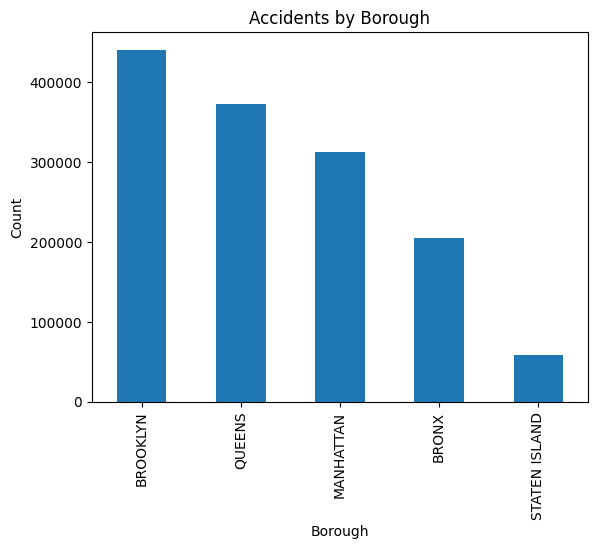

In [6]:
# Bar chart for 'BOROUGH'
borough_counts = df['BOROUGH'].value_counts()
borough_counts.plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Accidents by Borough')
plt.show()


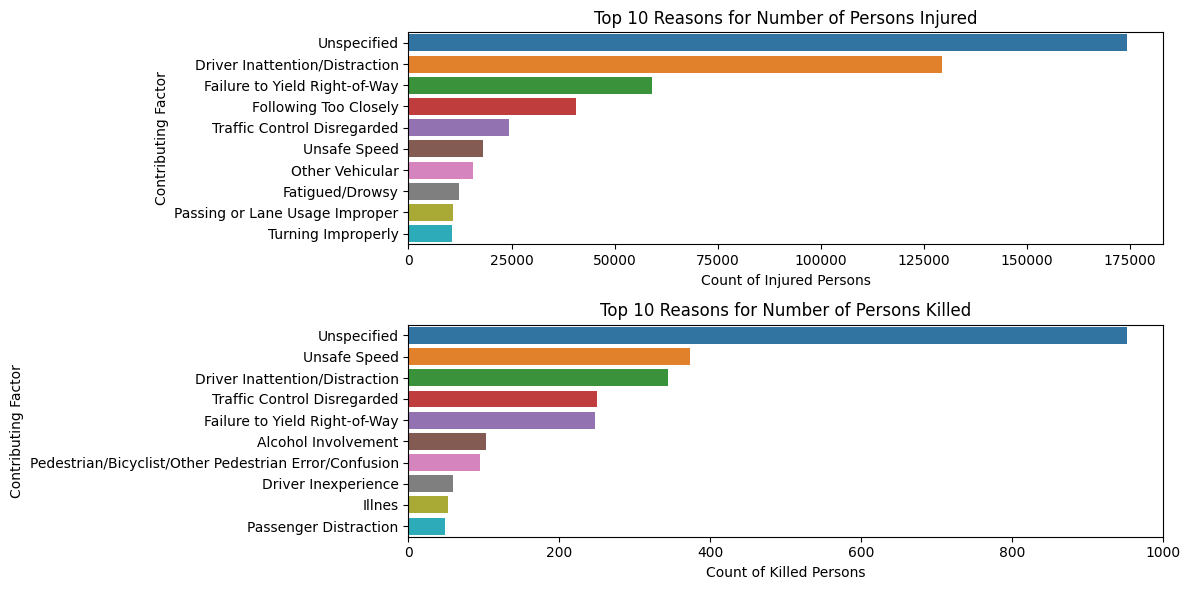

In [7]:
# Group the data by contributing factors and sum the counts of injured and killed persons
grouped_data = df.groupby('CONTRIBUTING FACTOR VEHICLE 1')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum().reset_index()

# Find the top 10 contributing factors for injuries and kills
top_10_injured = grouped_data.nlargest(10, 'NUMBER OF PERSONS INJURED')
top_10_killed = grouped_data.nlargest(10, 'NUMBER OF PERSONS KILLED')

# Create separate bar plots for injured and killed persons
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # Subplot for injured persons
sns.barplot(data=top_10_injured, x='NUMBER OF PERSONS INJURED', y='CONTRIBUTING FACTOR VEHICLE 1', orient='h')
plt.xlabel('Count of Injured Persons')
plt.ylabel('Contributing Factor')
plt.title('Top 10 Reasons for Number of Persons Injured')

plt.subplot(2, 1, 2)  # Subplot for killed persons
sns.barplot(data=top_10_killed, x='NUMBER OF PERSONS KILLED', y='CONTRIBUTING FACTOR VEHICLE 1', orient='h')
plt.xlabel('Count of Killed Persons')
plt.ylabel('Contributing Factor')
plt.title('Top 10 Reasons for Number of Persons Killed')

plt.tight_layout()
plt.show()


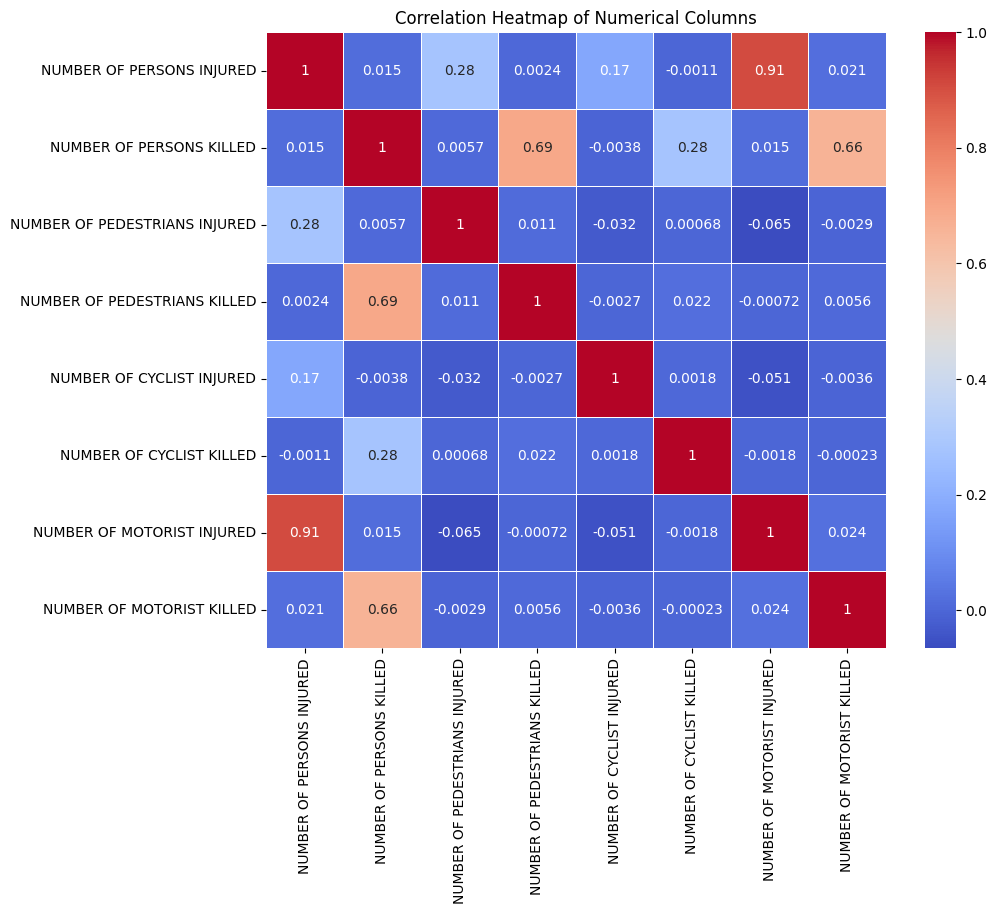

In [8]:
# Correlation between injured and killed
# Select the relevant numerical columns
numerical_columns = [
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED',
    'NUMBER OF MOTORIST KILLED'
]

# Create a correlation matrix for the numerical columns
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


### Time Series Analysis Graph

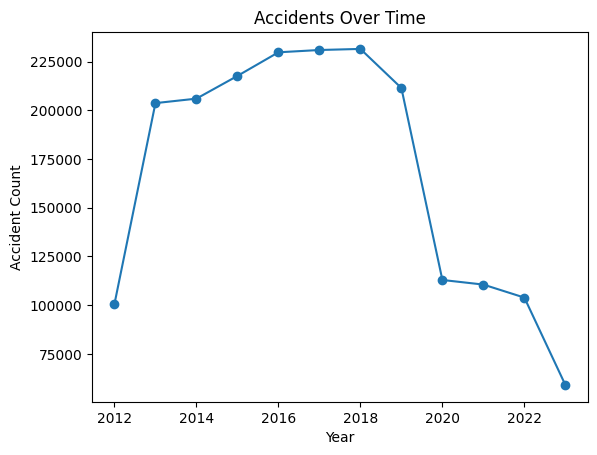

In [10]:
# Count accidents by year
df['Year'] = df['CRASH DATE_CRASH TIME'].dt.year
year_counts = df['Year'].value_counts().sort_index()
year_counts.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.title('Accidents Over Time')
plt.show()


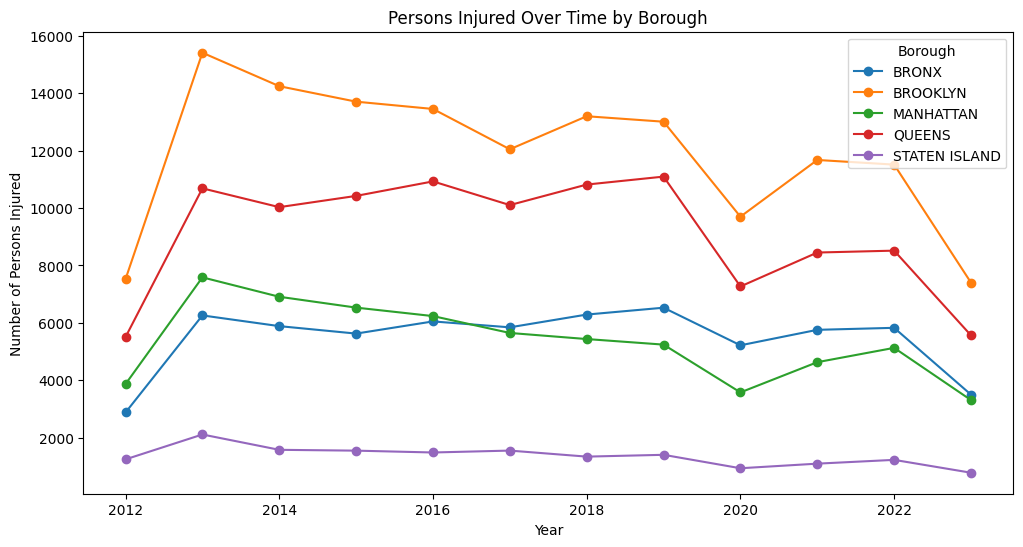

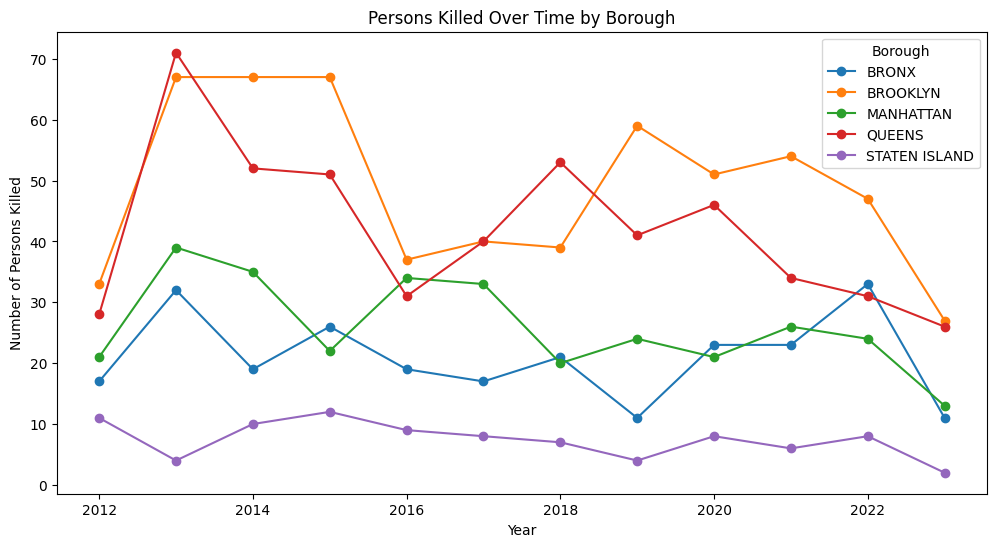

In [11]:
# Graph injured and killed number over year categorized by borough
# Group data by borough and year, and calculate the sum of injured and killed persons
borough_injured_counts = df.groupby(['Year', 'BOROUGH'])['NUMBER OF PERSONS INJURED'].sum().unstack()
borough_killed_counts = df.groupby(['Year', 'BOROUGH'])['NUMBER OF PERSONS KILLED'].sum().unstack()

# Plot the number of persons injured over time for each borough
plt.figure(figsize=(12, 6))
for borough in borough_injured_counts.columns:
    plt.plot(borough_injured_counts.index, borough_injured_counts[borough], marker='o', label=borough)

plt.xlabel('Year')
plt.ylabel('Number of Persons Injured')
plt.title('Persons Injured Over Time by Borough')
plt.legend(title='Borough')
plt.show()

# Plot the number of persons killed over time for each borough
plt.figure(figsize=(12, 6))
for borough in borough_killed_counts.columns:
    plt.plot(borough_killed_counts.index, borough_killed_counts[borough], marker='o', label=borough)

plt.xlabel('Year')
plt.ylabel('Number of Persons Killed')
plt.title('Persons Killed Over Time by Borough')
plt.legend(title='Borough')
plt.show()


## Borough with the maximum number of crashes reported since 2012

In [12]:
# Filter the dataframe and make it after 2012
df['CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])
start_date = pd.to_datetime('2012-01-01')
filtered_df = df[df['CRASH DATE_CRASH TIME'] >= start_date]


In [13]:
# Count the total value of different borough
borough_crash_counts = filtered_df['BOROUGH'].value_counts()


In [14]:
# Get the maximum one and the count of it
highest_crash_borough = borough_crash_counts.idxmax()
highest_crash_count = borough_crash_counts.max()

print(f"The borough with the highest total number of crashes reported since 2012 is {highest_crash_borough} with {highest_crash_count} crashes.")


The borough with the highest total number of crashes reported since 2012 is BROOKLYN with 441026 crashes.


## Borough with the maximum number of crashes adjusted for population

In [15]:
# Population data
population_data = {
    'BRONX': 1446788,
    'BROOKLYN': 2648452,
    'MANHATTAN': 1638281,
    'QUEENS': 2330295,
    'STATEN ISLAND': 487155
}

# Total number of crashes for each borough
total_crashes_by_borough = df['BOROUGH'].value_counts()

# Calculate crash rate per 100,000 people for each borough
crash_rates = {}
for borough, total_crashes in total_crashes_by_borough.items():
    population = population_data.get(borough, 1)  # Use 1 as a fallback in case population data is missing
    crash_rate = (total_crashes / population) * 100000
    crash_rates[borough] = crash_rate

# Find the borough with the maximum crash rate per 100,000 people
highest_crash_rate_borough = max(crash_rates, key=crash_rates.get)
highest_crash_rate = crash_rates[highest_crash_rate_borough]

print(f"The borough with the highest crash rate per 100,000 people since July 2012 is {highest_crash_rate_borough} with a rate of {highest_crash_rate:.2f}.")


The borough with the highest crash rate per 100,000 people since July 2012 is MANHATTAN with a rate of 19121.63.


## Analyzing the leading cause of crashes

In [11]:
# Filter the dataset to exclude rows with 'Unspecified' in 'CONTRIBUTING FACTOR VEHICLE 1'
filtered_df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Count the occurrences of each unique value in 'CONTRIBUTING FACTOR VEHICLE 1'
factor_counts = filtered_df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Determine the leading cause (the factor with the highest count)
leading_cause = factor_counts.idxmax()
leading_cause_count = factor_counts.max()

# Calculate the proportion of accidents attributable to the leading cause
total_accidents = len(filtered_df)
proportion_of_accidents = (leading_cause_count / total_accidents) * 100

print(f"The leading cause of crashes (excluding 'Unspecified') is '{leading_cause}' with {leading_cause_count} occurrences.")
print(f"The proportion of accidents attributable to this cause is {proportion_of_accidents:.2f}%.")


The leading cause of crashes (excluding 'Unspecified') is 'Driver Inattention/Distraction' with 401262 occurrences.
The proportion of accidents attributable to this cause is 30.27%.


## Top 3 causes of crashes 

In [16]:
# Filter the dataset to exclude rows with 'Unspecified' in 'CONTRIBUTING FACTOR VEHICLE 1'
filtered_df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Count the occurrences of each unique value in 'CONTRIBUTING FACTOR VEHICLE 1'
factor_counts = filtered_df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Select the top 3 causes, excluding 'Unspecified'
top_factors = factor_counts.index[0:3]  

# Calculate the total count of accidents for the top 3 causes
total_count_top_factors = factor_counts.loc[top_factors].sum()

# Calculate the proportion of total accidents accounted for by the top 3 causes
total_accidents = len(filtered_df)
proportion_of_accidents_top_3 = (total_count_top_factors / total_accidents) * 100

print("The top 3 causes of crashes (excluding 'Unspecified') and their counts:")
for cause in top_factors:
    cause_count = factor_counts.loc[cause]
    print(f"'{cause}': {cause_count} occurrences")

print(f"The proportion of total crashes accounted for by the top 3 causes is {proportion_of_accidents_top_3:.2f}%.")


The top 3 causes of crashes (excluding 'Unspecified') and their counts:
'Driver Inattention/Distraction': 401262 occurrences
'Failure to Yield Right-of-Way': 119166 occurrences
'Following Too Closely': 107467 occurrences
The proportion of total crashes accounted for by the top 3 causes is 47.37%.


## Analyzing fatalities

In [14]:
# Filter the dataset to include only accidents with at least one fatality
fatal_accidents_df = df[df['NUMBER OF PERSONS KILLED'] > 0]

# Count the number of accidents involving at least one fatality
total_fatal_accidents = len(fatal_accidents_df)

print(f"The total count of accidents that involved at least one fatality since 2012 is {total_fatal_accidents}.")


The total count of accidents that involved at least one fatality since 2012 is 2804.


## Likelihood of fatal accidents
#### On average, out of every 1000 accidents, how many have resulted in at least one person dead?

In [15]:
# Count the total number of accidents in the dataset since 2012
total_accidents = len(df)

# Filter the dataset to include only accidents with at least one fatality
fatal_accidents_df = df[df['NUMBER OF PERSONS KILLED'] > 0]

# Count the number of accidents involving at least one fatality
total_fatal_accidents = len(fatal_accidents_df)

# Calculate the ratio of accidents with at least one fatality to total accidents
ratio = (total_fatal_accidents / total_accidents) * 1000

print(f"On average, for every 1000 accidents, there are {ratio:.2f} accidents that have resulted in at least one person dead.")


On average, for every 1000 accidents, there are 1.39 accidents that have resulted in at least one person dead.


## Missing data
#### What proportion of accidents in the data do not have a Borough code?

In [16]:
import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame named 'df'

# Count the number of rows with missing or unspecified borough codes
missing_borough_count = len(df[df['BOROUGH'].isna() | (df['BOROUGH'] == 'Unspecified')])

# Calculate the total number of accidents in the dataset
total_accidents = len(df)

# Calculate the proportion of accidents without a borough code
proportion_missing_borough = (missing_borough_count / total_accidents) * 100

print(f"The proportion of accidents in the data without a borough code is {proportion_missing_borough:.2f}%.")


The proportion of accidents in the data without a borough code is 31.11%.


## Which combinations of vehicles have the most number of accidents

In [17]:
# Combine 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' into a new column
df['VEHICLE COMBINATION'] = df['VEHICLE TYPE CODE 1'] + ' & ' + df['VEHICLE TYPE CODE 2']

# Count the occurrences of each combination
vehicle_combination_counts = df['VEHICLE COMBINATION'].value_counts()

# Determine the combination with the most accidents
most_common_combination = vehicle_combination_counts.idxmax()
most_common_combination_count = vehicle_combination_counts.max()

print(f"The combination of vehicles with the most accidents is '{most_common_combination}' with {most_common_combination_count} accidents.")


The combination of vehicles with the most accidents is 'Sedan & Sedan' with 197944 accidents.


***  
## Finished